# Models d'Intel·ligència Artificial

## Segon lliurament

Aquesta tasca conté tres preguntes: una d'agents (6 punts), una de PDDL (2 punts) i una de lògica difusa (2 punts).


# 1. Agent per objectius

A l'activitat d'aprenentatge teniu un agent per resoldre graelles de **tangram** com els del puzzle 150deff5, el cinquè exemple de [arcprize.org](https://arcprize.org/). Completau l'agent que teniu començat a l'**activitat d'aprenentatge** seguint les indicacions següents.


#### a) Comprovau que l'agent ja resol correctament el segon exemple d'entrenament, però no el primer ni el tercer.

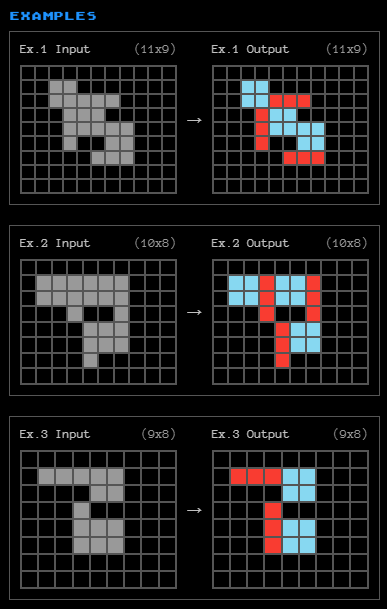


In [25]:
## TANGRAM AGENT ##
import numpy as np
import itertools


def fit_squares(grid):
    # Retorna una llista de graelles amb un quadrat de 2x2 que encaixa dins l'ombra.
    rows, cols = grid.shape

    square_list = []
    for r in range(rows - 1):
        for c in range(cols - 1):
            if (
                grid[r, c] != 0
                and grid[r + 1, c] != 0
                and grid[r, c + 1] != 0
                and grid[r + 1, c + 1] != 0
            ):
                h = np.zeros(grid.shape)
                h[r, c] = 1
                h[r + 1, c] = 1
                h[r, c + 1] = 1
                h[r + 1, c + 1] = 1
                square_list.append(h)

    return square_list


def fit_vertical_bars(grid):
    # Retorna una llista de graelles amb una barra de mida 3x1 dins l'ombra.
    rows, cols = grid.shape

    v_bar_list = []

    for r in range(rows - 2):
        for c in range(cols):
            if grid[r, c] != 0 and grid[r + 1, c] != 0 and grid[r + 2, c] != 0:
                h = np.zeros(grid.shape)
                h[r, c] = 1
                h[r + 1, c] = 1
                h[r + 2, c] = 1
                v_bar_list.append(h)

    return v_bar_list


# Function to solve JUST the second problem
def solve_second_tangram(shadow):
    # * Code taken from TANGRAM agent from class notes * #
    # Agrupam totes les peces dins una matriu 3D i la mostram
    sq = fit_squares(shadow)
    vb = fit_vertical_bars(shadow)
    block_list = sq + vb

    peces = np.array(block_list)
    N = peces.shape[0]  # nombre de peces candidates
    n_solutions = 0  # Count the number of solutions

    for selector_de_peces in itertools.product(
        [0, 1], repeat=N
    ):  # cada peça pot ser-hi o no, generam totes les combinacions possibles
        suma_de_peces = np.sum(peces[np.array(selector_de_peces, dtype=bool)], axis=0)
        if np.array_equal(suma_de_peces, shadow):
            n_solutions += 1
            print(f"----- Solution {n_solutions} -----")
            print(f"Selector: {selector_de_peces}")
            print(f"Solved grid:\n{suma_de_peces}")

    if not n_solutions:
        print("This grid has no possible solutions")

In [26]:
grid_1 = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

grid_2 = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

grid_3 = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

print("GRID 1")
solve_second_tangram(grid_1)
print("GRID 2")
solve_second_tangram(grid_2)
print("GRID 3")
solve_second_tangram(grid_3)

GRID 1
This grid has no possible solutions
GRID 2
----- Solution 1 -----
Selector: (1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
GRID 3
This grid has no possible solutions


#### b) Ha de ser capaç de trobar solucions que incloguin barres horitzontals de 3x1 cel·les. Comprovau que amb aquesta modificació l'agent resol tots els exemples d'entrenament.


In [34]:
def fit_horizontal_bars(grid):
    # Re-shaped code from v-bars function for h-bars
    rows, cols = grid.shape

    h_bar_list = []

    for r in range(rows):
        for c in range(cols-2):
            if grid[r, c] != 0 and grid[r, c+1] != 0 and grid[r, c + 2] != 0:
                h = np.zeros(grid.shape)
                h[r, c] = 1
                h[r, c+ 1] = 1
                h[r, c + 2] = 1
                h_bar_list.append(h)

    return h_bar_list

from itertools import combinations
# Same code from solve_second_tangram, just added the fit_horizontal_bars function
def solve_tangram(shadow):
	sq = fit_squares(shadow)
	vb = fit_vertical_bars(shadow)
	hb = fit_horizontal_bars(shadow)
	block_list = sq+vb+hb

	peces = np.array(block_list)
	N = peces.shape[0]
	n_solutions = 0 

	for selector_de_peces in itertools.product([0,1], repeat=N):
		suma_de_peces = np.sum(peces[np.array(selector_de_peces, dtype=bool)], axis=0)
		if  np.array_equal(suma_de_peces, shadow):
			n_solutions += 1
			print(f'----- Solution {n_solutions}')
			print(f'Selector: {selector_de_peces}')
			print(f'Solved grid:\n{suma_de_peces}')
			
	if not n_solutions: print('This grid has no possible solutions')


print('----- GRID 1 -----')
solve_tangram(grid_1)
print('\n----- GRID 2 -----')
solve_tangram(grid_2)
print('\n----- GRID 3 -----')
solve_tangram(grid_3)

----- GRID 1 -----
----- Solution 1
Selector: (1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

----- GRID 2 -----
----- Solution 1
Selector: (1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

----- GRID 3 -----
----- Solution 1
Selector: (1, 0, 1, 1, 1, 0, 0, 0, 0)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0

#### c) Ha de mostrar per la consola si ha aconseguit l'objectiu, i amb quantes solucions diferents.

Se ha resuelto en el primer apartado mediante el uso de la variable `n_solutions` como contador. Se comprueba el valor de ésta para mostrar un mensaje por consola en caso de no existir soluciones posibles.

#### d) Comprovau que la solució a l'exemple de test també és correcta.

In [35]:
example_grid = np.array(
    [
        [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

print("----- EXAMPLE GRID -----")
solve_tangram(example_grid)

----- EXAMPLE GRID -----
----- Solution 1
Selector: (1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1)
Solved grid:
[[0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### e) Pensau una graella d'entrada que no tengui solució, i una altra que tengui més d'una solució. La resposta de l'agent en aquests casos és correcta?

In [41]:
non_solution = np.array(
    [
        [1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 1, 0],
    ]
)
print("----- NON SOLUTIONABLE GRID -----")
solve_tangram(non_solution)

# Thanks ChatGPT ¯\_(ツ)_/¯
multiple_solution = np.array(
    [
      [1, 1, 1, 0],
      [1, 1, 1, 0],
      [1, 1, 1, 0],
    ]
)
print("----- MULTIPLE SOLUTIONS GRID -----")
solve_tangram(multiple_solution)

----- NON SOLUTIONABLE GRID -----
This grid has no possible solutions
----- MULTIPLE SOLUTIONS GRID -----
----- Solution 1
Selector: (0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
Solved grid:
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]
----- Solution 2
Selector: (0, 0, 0, 0, 1, 1, 1, 0, 0, 0)
Solved grid:
[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]


Como comentario diré que el ejemplo de múltiples soluciones parece muy simple pero ha sido el resultado más óptimo en cuanto a tiempo se refiere, al poder existir varias soluciones, el algoritmo de este ejercicio toma demasiado tiempo. El array ha sido provisto por ChatGPT visto que no podía crear uno que tuviera varias soluciones y además de ser lo suficientemente simple para que se ejecutara relativamente rápido. También puede deberse a ineficiencias del algoritmo.

A continuación dejo algunos ejemplos de matrices con varias soluciones que tardan demasiado (no he terminado ninguna) a modo de curiosidad:

In [ ]:
multiple_solution2 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0],
    ]
)

multiple_solution3 = np.array(
    [
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1],
		  [1, 1, 1, 1, 1, 1],
    ]
)

multiple_solution4 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0],
        [1, 1, 0, 0, 0],
    ]
)

#### f) Escriviu funcions que mostrin les graelles amb gràfics de colors, com als exemples de la web arcprize.org.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_matrix_grid(grid):
	rows, cols = grid.shape
	print(rows, cols)
	plt.figure(figsize=(6, 6))
	plt.imshow(
		grid, cmap="gray_r"
	)  # 'gray_r' is the reverse of 'gray', so 1 is gray and 0 is black
	plt.grid(True, which="both", color="lightgrey", linestyle="-", linewidth=0.5)
	plt.xticks(np.arange(-0.5, len(grid), 1), [])
	plt.yticks(np.arange(-0.5, len(grid[0]), 1), [])
	plt.title("Matrix Grid Visualization")
	plt.tight_layout()
	plt.show()


# Example 1: 5x5 random matrix
matrix1 = np.random.randint(0, 2, size=(5, 5))
print("Example 1: 5x5 random matrix")
print(matrix1)
plot_matrix_grid(matrix1)

# Example 2: 8x8 checkerboard pattern
matrix2 = np.zeros((8, 8), dtype=int)
matrix2[1::2, ::2] = 1
matrix2[::2, 1::2] = 1
print("\nExample 2: 8x8 checkerboard pattern")
print(matrix2)
plot_matrix_grid(matrix2)

# Example 3: 6x6 custom pattern
matrix3 = np.array(
    [
        [1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 1],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 0, 1],
        [0, 1, 0, 0, 1, 0],
    ]
)
print("\nExample 3: 6x6 custom pattern")
print(matrix3)
plot_matrix_grid(matrix3)

# 2. PDDL

**a** Executau l'exemple de PDDL dels apunts a la pàgina web

http://editor.planning.domains/

i adjuntau una captura de la planificació que obteniu.


#### Domain

```pddl
(define (domain transport)
    (:predicates
        (A ?c ?r)
        (Dins ?c ?a)
        (Carrega ?c)
        (Avio ?a)
        (Aeroport ?r))

    (:action Carregar
        :parameters (?c ?a ?r)
        :precondition (and (A ?c ?r) (A ?a ?r) (Carrega ?c) (Avio ?a) (Aeroport ?r) )
        :effect(and (not(A ?c ?r)) (Dins ?c ?a)  ) )


    (:action Descarregar
        :parameters (?c ?a ?r)
        :precondition (and (Dins ?c ?a) (A ?a ?r) (Carrega ?c) (Avio ?a) (Aeroport ?r) )
        :effect(and (A ?c ?r) (not (dins ?c ?a))))

    (:action Volar
        :parameters (?a ?origen ?desti)
        :precondition (and (A ?a ?origen) (Avio ?a) (Aeroport ?origen) (Aeroport ?desti))
        :effect (and (not(A ?a ?origen)) (A ?a ?desti))))
```

#### Problem

```pddl
(define (problem transport-mad-bcn)
    (:domain transport)
    (:objects A1 A2 C1 C2 MAD BCN)
    (:init
        (Avio A1)
        (Avio A2)
        (Carrega C1)
        (Carrega C2)
        (Aeroport MAD)
        (Aeroport BCN)
        (A A1 MAD)
        (A A2 BCN)
        (A C1 MAD)
        (A C2 BCN))
    (:goal (and (A C1 BCN) (A C2 MAD))))
```

Copiando cada uno en archivos diferentes del editor online y configurando cuál es la definición (o dominio) y el problema en la opción _Solver_ de la barra de navegació, se obtiene el siguiente resultado:

![Volar A1 Madrid - Barcelona](img/0.png) ![Cargar C2 A2 Barcelona](img/1.png) ![Volar A2 Barcelona - Madrid](img/2.png) ![Descargar C2 A2 Madrid](img/3.png) ![Volar A1 Barcelona - Madrid](img/4.png) ![Cargar C1 A1 Madrid](img/5.png) ![Volar A1 Madrid - Barcelona](img/6.png) ![Cargar C1 A1 Barcelona](img/7.png)


**b** Realitzau la mateixa planificació utilitzant les llibreries pddlpy (https://pypi.org/project/pddl/) i pyperplan comparau el resultat amb el de l'apartat anteriour. Escriviu el vostre codi a la cel·la de baix. Les planificacions que s'obtenen són iguals?


In [14]:
from pddl.logic import Predicate, variables, constants
from pddl.core import Domain, Problem
from pddl.action import Action

# from pddl.requirements import Requirements #? -> In the documentation this is imported but I don't think is necessary for this case


### DOMAIN ###
a, c, r, origen, desti = variables("a c r origen desti")

at, dins, carrega, avio, aeroport = (
    Predicate("at", c, r),
    Predicate("dins", c, a),
    Predicate("carrega", c),
    Predicate("avio", a),
    Predicate("aeroport", r),
)  # Changed 'a' predicate from ppdl statement to 'at' so it does not overwrite 'a' variable
predicates = [at, dins, carrega, avio, aeroport]

carregar = Action(
    "carregar",
    parameters=[a, c, r],
    precondition=at(c, r) & at(a, r) & carrega(c) & avio(a) & aeroport(r),
    effect=~at(c, r) & dins(c, a),
)
descarregar = Action(
    "descarregar",
    parameters=[a, c, r],
    precondition=dins(c, a) & at(a, r) & carrega(c) & avio(a) & aeroport(r),
    effect=at(c, r) & ~dins(c, a),
)
volar = Action(
    "volar",
    parameters=[a, origen, desti],
    precondition=at(a, origen) & avio(a) & aeroport(origen) & aeroport(desti),
    effect=~at(a, origen) & at(a, desti),
)
actions = [carregar, descarregar, volar]

transport = Domain("transport", predicates=predicates, actions=actions)
# print(f'DOMAIN:\n{transport}') # -> Comment this line if you wish


### PROBLEM ###
a1, a2, c1, c2, mad, bcn = constants("a1 a2 c1 c2 mad bcn")
objects = [a1, a2, c1, c2, mad, bcn]
transport_mad_bcn = Problem(
    "transport-mad-bcn",
    domain=transport,
    objects=objects,
    init=[
        avio(a1),
        avio(a2),
        carrega(c1),
        carrega(c2),
        aeroport(mad),
        aeroport(bcn),
        at(a1, mad),
        at(a2, bcn),
        at(c1, mad),
        at(c2, bcn),
    ],
    goal=at(c1, bcn) & at(c2, mad),
)
# print(f'PROBLEM:\n{transport_mad_bcn}') # -> Comment this line if you wish
#! Just to point that the output is the same as the provided in the statement for both domain and problem, but with some differences in names etc.

In [ ]:
# Save both domain and problem into files to exdcute the planner with them as arguments
with open("transport.pddl", "w") as f:
    f.write(str(transport))

with open("transport_problem.pddl", "w") as f:
    f.write(str(transport_mad_bcn))

Execute the `pyperplan` cli command with saved files


In [17]:
# Ignore de SyntaxError, it creates the .soln file without issues
!pyperplan ./transport.pddl ./transport_problem.pddl

2024-11-10 19:33:37,963 INFO     using search: breadth_first_search
2024-11-10 19:33:37,963 INFO     using heuristic: None
2024-11-10 19:33:37,963 INFO     Parsing Domain /home/carlos/Development/IEDIB_CEIA_2024-25/Modelos de Inteligencia Artificial/Bloque 2/Actividades/2.1/transport.pddl
2024-11-10 19:33:37,964 INFO     Parsing Problem /home/carlos/Development/IEDIB_CEIA_2024-25/Modelos de Inteligencia Artificial/Bloque 2/Actividades/2.1/transport_problem.pddl
2024-11-10 19:33:37,965 INFO     5 Predicates parsed
2024-11-10 19:33:37,965 INFO     3 Actions parsed
2024-11-10 19:33:37,965 INFO     6 Objects parsed
2024-11-10 19:33:37,965 INFO     0 Constants parsed
2024-11-10 19:33:37,965 INFO     Grounding start: transport-mad-bcn
2024-11-10 19:33:37,967 INFO     Relevance analysis removed 0 facts
2024-11-10 19:33:37,967 INFO     Grounding end: transport-mad-bcn
2024-11-10 19:33:37,967 INFO     12 Variables created
2024-11-10 19:33:37,967 INFO     20 Operators created
2024-11-10 19:33:37

#### Conclusión de los resultados

Como conclisión de los resultados obtenidos podemos asumir que cumplen su propósito ya que ambos resuelven el problema planteado. Sin embargo se pueden apreciar diferencias notables en éstas y los pasos o acciones que ejecutan para solucionar el problema.

En el caso de la herramienta web, se puede ver que hay un movimiento que no aporta positivamente (ni negativamente tampoco en gran medida) a la resolución y son el primero y el quinto, donde se desplaza un avión sin necesidad. Esto puede deberse al algoritmo solucionador ya que esta herramienta permite seleccionar entre varios (para esta tarea he utilizado el primero, el por defecto).

![Solver Algorithms](img/solvers.png)

Cuando se usa la herramienta de terminal o cli de `pyperplan`, la cual pasamos como argumento de programa el dominio y problema a resolver, genera un archivo `.soln` el cual contiene la solución generada por el algoritmo. En este caso la solución se reduce a 6 pasos en vez de 8 y no parecen existir pasos innecesarios, parece bastante eficiente la solución.

Cabe mencionar que probablemente sean algoritmos distintos y que por eso existe una diferencia tan notoria. Como experimento, he ejecutado el mismo problema con `LAMA-first`:

![LAMA-first solution](img/lama_solution.png)

Este resultado se puede ver que se asemeja más al obtenido mediante `pyperplan` salvando el orden de las acciones.


# 3 Lògica difusa

A partir de l'exemple dels apunts del càlcul de la propina, obteniu una gràfica que mostri la forma de la funció que hem implementat. Es tracta d'obtenir una representació semblant a la de la figura. Aquest gràfic ens mostra la utilitat de la lògica difusa: definir una funció suau relativament complexa a partir de tot just algunes descripcions vagues, poc precises.

Aquí teniu la documentació per realitzar gràfics tridimensionals amb Python.

https://matplotlib.org/stable/gallery/mplot3d/index.html

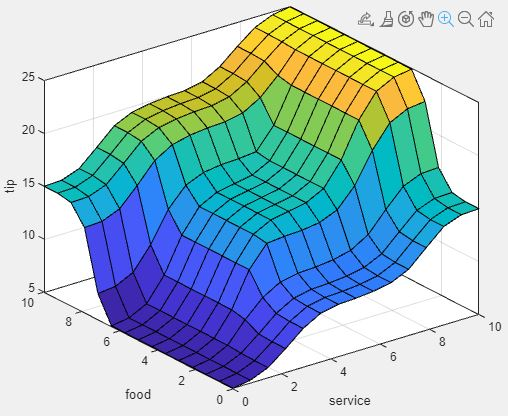


### Resultado

Copio el código del ejemplo 'fuzzy_tip' ([enlace al colab](https://colab.research.google.com/drive/1SRq6mvtxQaCBbnC82tDrg1mByK9nDVCf?usp=sharing#scrollTo=RaglMwE3pe0H)), proporcionado en los apuntes, modificado para la generación del gráfico que se pide para el ejercicio.


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_quality = ctrl.Antecedent(np.arange(0, 11), "food quality")
service_quality = ctrl.Antecedent(np.arange(0, 11), "service quality")
tip = ctrl.Consequent(np.arange(0, 26), "tip")

food_quality.automf(names=["bad", "average", "good"])
service_quality.automf(names=["bad", "average", "good"])

tip["low"] = fuzz.trimf(tip.universe, [0, 0, 13])
tip["mid"] = fuzz.trimf(tip.universe, [0, 13, 25])
tip["high"] = fuzz.trimf(tip.universe, [13, 25, 25])

tipping = ctrl.ControlSystemSimulation(
    ctrl.ControlSystem(
        [
            ctrl.Rule(food_quality["bad"] | service_quality["bad"], tip["low"]),
            ctrl.Rule(service_quality["average"] | service_quality["bad"], tip["low"]),
            ctrl.Rule(food_quality["good"] | service_quality["good"], tip["high"]),
        ]
    )
)

tipping.inputs({"food quality": 7, "service quality": 6})

tipping.compute()

print(tipping.output["tip"])

10.429100529100525


Código para generar el gráfico:


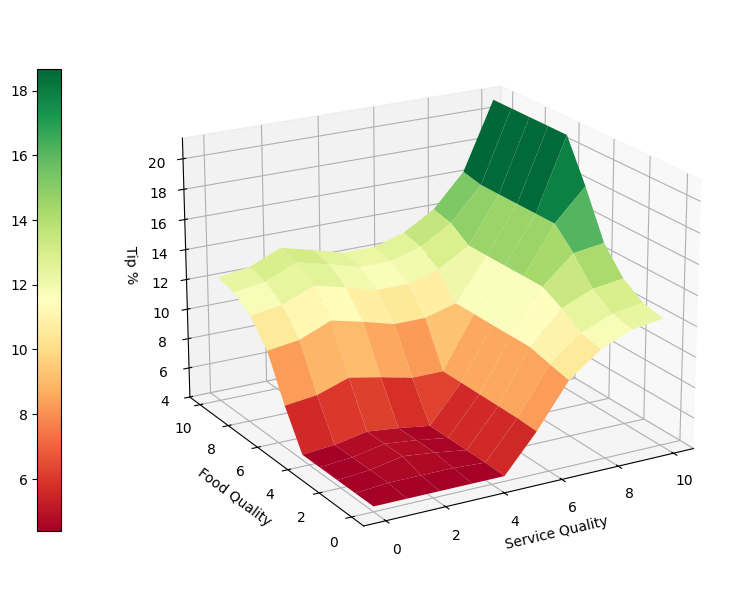

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLES = 10  # Number of samples for the graphic -> Modify this value as you wish

food_axis = np.linspace(0, 10, SAMPLES)
service_axis = np.linspace(0, 10, SAMPLES)
service_axis, food_axis = np.meshgrid(service_axis, food_axis)

for i in range(SAMPLES):
    for j in range(SAMPLES):
        tipping.input["food quality"] = food_axis[i, j]
        tipping.input["service quality"] = service_axis[i, j]
        tipping.compute()
        tip_axis[i, j] = tipping.output["tip"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("Service Quality")
ax.set_ylabel("Food Quality")
ax.set_zlabel("Tip %")
ax.view_init(elev=20, azim=-120)  # Plot angle -> Modify as wish
surf = ax.plot_surface(service_axis, food_axis, tip_axis, cmap="RdYlGn")

# This is not necessary, but cool to have
cbar = fig.colorbar(surf, shrink=0.6, aspect=20, location="left")
# ? I could not configure out correctly the ticks so the bar goes from 0 to 25, here I leave some Gemini provided code that does not work. If you can fix it, I want to know how jejeje Thanks!
""" 
cbar.set_ticks(np.linspace(0, 25, 6))
cbar.set_ticklabels([0, 5, 10, 15, 20, 25])
 """

plt.show()